In [1]:
# https://www.kaggle.com/manmeetkaur07/eda-with-movie-lens-dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('./ml-100k'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./ml-100k\allbut.pl
./ml-100k\mku.sh
./ml-100k\README
./ml-100k\u.data
./ml-100k\u.genre
./ml-100k\u.info
./ml-100k\u.item
./ml-100k\u.occupation
./ml-100k\u.user
./ml-100k\u1.base
./ml-100k\u1.test
./ml-100k\u2.base
./ml-100k\u2.test
./ml-100k\u3.base
./ml-100k\u3.test
./ml-100k\u4.base
./ml-100k\u4.test
./ml-100k\u5.base
./ml-100k\u5.test
./ml-100k\ua.base
./ml-100k\ua.test
./ml-100k\ub.base
./ml-100k\ub.test


In [5]:
column_names = ['user_id', 'item_id', 'rating','timestamp']
df = pd.read_csv('./ml-100k/u.data', sep='\t', names=column_names)

In [6]:
df.head(5)

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [7]:
df.shape

(100000, 4)

In [8]:
# To check the number of unique users
df['user_id'].nunique()

943

In [9]:
# Checking the number of unique movies
df['item_id'].nunique()

1682

In [11]:
movies_title = pd.read_csv('./ml-100k/u.item', sep='\|', header=None)

<ipython-input-11-cd21f2a68217>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_title = pd.read_csv('./ml-100k/u.item', sep='\|', header=None)


In [12]:
movies_title.shape

(1682, 24)

In [13]:
movies_title = movies_title[[0,1]]

In [14]:
movies_title.columns = ['item_id', 'title']

In [15]:
movies_title.head(5)

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [16]:
# Merging the earlier dataframe on the basis of item_id with the movies_title
df = pd.merge(df, movies_title, on='item_id')

In [17]:
# Validating the merge...
df.tail()

user_id  item_id  rating  timestamp  \
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                   title  
99995                                  Mamma Roma (1962)  
99996                             Eighth Day, The (1996)  
99997                                  Girls Town (1996)  
99998  Silence of the Palace, The (Saimt el Qusur) (1...  
99999                                    Dadetown (1995)

Performing some EDA

In [18]:
# Finding the average rating of a movie
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [19]:
# How many times a movie has been watched (arranged in descending order)
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [20]:
# Create a DF of the ratings for movies
ratings_df = pd.DataFrame(df.groupby('title').mean()['rating'])

In [21]:
# Adding the number of ratings column to the df created earlier
ratings_df['number of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [22]:
ratings_df.head()

rating  number of ratings
title                                                 
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41

In [23]:
ratings_df.sort_values(by='rating', ascending=False)

rating  number of ratings
title                                                                  
They Made Me a Criminal (1939)                   5.0                  1
Marlene Dietrich: Shadow and Light (1996)        5.0                  1
Saint of Fort Washington, The (1993)             5.0                  2
Someone Else's America (1995)                    5.0                  1
Star Kid (1997)                                  5.0                  3
...                                              ...                ...
Eye of Vichy, The (Oeil de Vichy, L') (1993)     1.0                  1
King of New York (1990)                          1.0                  1
Touki Bouki (Journey of the Hyena) (1973)        1.0                  1
Bloody Child, The (1996)                         1.0                  1
Crude Oasis, The (1995)                          1.0                  1

[1664 rows x 2 columns]

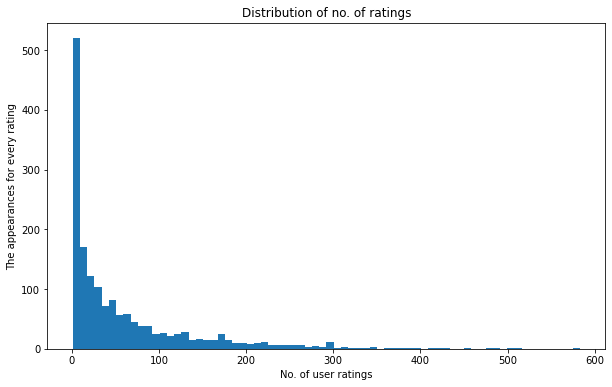

In [24]:
# Checking the distribution of number of ratings vs appearances
plt.figure(figsize=(10,6))
plt.hist(ratings_df['number of ratings'], bins=70)
plt.xlabel('No. of user ratings')
plt.ylabel('The appearances for every rating')
plt.title('Distribution of no. of ratings')
plt.show()

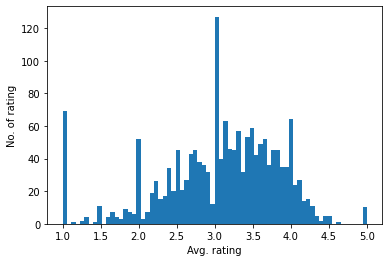

In [25]:
# Distribution of ratings
plt.hist(ratings_df['rating'],bins=70)
plt.xlabel('Avg. rating')
plt.ylabel('No. of rating')
plt.show()

# Aha, a normal distribution spotted !!!

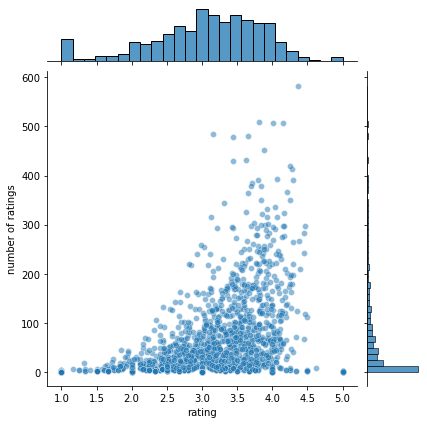

In [26]:
sns.jointplot(x = ratings_df['rating'], y = ratings_df['number of ratings'], data = ratings_df, alpha = 0.5)

Creating Movie Recommendation

In [27]:
# Create a matrix as user vs movie matrix with each cell having the rating for the corresponding movie
movie_matrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [28]:
movie_matrix

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   
...                      ...         ...                          ...   
939                      NaN         NaN                          NaN   
940                      NaN         NaN                          NaN   
941                      NaN         NaN                          NaN   
942                      NaN         NaN                          NaN   
943                      NaN         NaN                          2.0   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   
...                                      ...                           ...   
939                                      NaN                           NaN   
940                                      NaN                           NaN   
941                                      NaN                           NaN   
942                                      NaN                           3.0   
943                                      NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   
...                                              ...                   ...   
939                                              NaN                   NaN   
940                                              NaN                   NaN   
941                                              NaN                   NaN   
942                                              NaN                   3.0   
943                                              NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of th

In [29]:
# Mostly / highly watched movies
ratings_df.sort_values('number of ratings', ascending=False).head()

rating  number of ratings
title                                                 
Star Wars (1977)           4.358491                583
Contact (1997)             3.803536                509
Fargo (1996)               4.155512                508
Return of the Jedi (1983)  4.007890                507
Liar Liar (1997)           3.156701                485

In [30]:
# User-wise rating of a particular movie
starwars_usr_ratings = movie_matrix['Star Wars (1977)']
starwars_usr_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [31]:
# How much correlated is Star Wars with other movie
similar_to_starwars = movie_matrix.corrwith(starwars_usr_ratings)

E:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
E:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
similar_to_starwars
# NaN means the user didn't watch both the movies

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [33]:
corr_of_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [34]:
# Dropping NaN values
corr_of_starwars.dropna(inplace=True)

In [35]:
# A couple of other movies similar to Star wars
corr_of_starwars.sort_values('Correlation', ascending=False).head(10)

Correlation
title                                                          
Hollow Reed (1996)                                          1.0
Commandments (1997)                                         1.0
Cosi (1996)                                                 1.0
No Escape (1994)                                            1.0
Stripes (1981)                                              1.0
Star Wars (1977)                                            1.0
Man of the Year (1995)                                      1.0
Beans of Egypt, Maine, The (1994)                           1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0

In [36]:
corr_of_starwars = corr_of_starwars.join(ratings_df['number of ratings'])

In [37]:
corr_of_starwars[corr_of_starwars['number of ratings'] > 100].sort_values('Correlation', ascending=False)

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.747981   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   
...                                                         ...   
Edge, The (1997)                                      -0.127167   
As Good As It Gets (1997)                             -0.130466   
Crash (1996)                                          -0.148507   
G.I. Jane (1997)                                      -0.176734   
First Wives Club, The (1996)                          -0.194496   

                                                    number of ratings  
title                                                                  
Star Wars (1977)                                                  583  
Empire Strikes Back, The (1980)                                   367  
Return of the Jedi (1983)                                         507  
Raiders of the Lost Ark (1981)                                    420  
Austin Powers: International Man of Mystery (1997)                130  
...                                                               ...  
Edge, The (1997)                                                  113  
As Good As It Gets (1997)                                         112  
Crash (1996)                                                      128  
G.I. Jane (1997)                                                  175  
First Wives Club, The (1996)                                      160  

[334 rows x 2 columns]

In [38]:
# Ok, let's create a function and check if we can implement the same thing
def recommend_movies(movie_name):
    movie_usr_ratings = movie_matrix[movie_name]
    similar_movie = movie_matrix.corrwith(movie_usr_ratings)
    
    corr_of_movie = pd.DataFrame(similar_movie, columns=['Correlation'])
    corr_of_movie.dropna(inplace=True)
    
    corr_of_movie = corr_of_movie.join(ratings_df['number of ratings'])
    
    predictions = corr_of_movie[corr_of_movie['number of ratings'] > 100].sort_values('Correlation', ascending=False)
    
    return predictions

In [39]:
predictions = recommend_movies('Crash (1996)')
predictions.head()

E:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
E:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation  number of ratings
title                                                              
Crash (1996)                            1.000000                128
Down Periscope (1996)                   0.737162                101
Sex, Lies, and Videotape (1989)         0.664509                101
Monty Python's Life of Brian (1979)     0.651013                174
Happy Gilmore (1996)                    0.536685                149